## Exploratory Data Analysis

In [ ]:
# Import pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

In [ ]:
# Read the restaurants csv file
restaurants = pd.read_csv("../files/paris_restaurants.csv")
print(restaurants)

In [ ]:
# Make a plot of all points
fig, ax = plt.subplots()
ax.plot(restaurants.x, restaurants.y, 'o')
plt.show()

### Add a background map

In [ ]:
# Import contextily
import contextily
 
# A figure of all restaurants with background
fig, ax = plt.subplots()
ax.plot(restaurants.x, restaurants.y, 'o', markersize=1)
contextily.add_basemap(ax)
plt.show()

### Playing with `Geopandas`

In [ ]:
# Import GeoPandas
import geopandas as gpd
 
# Read the Paris districts dataset
districts = gpd.read_file('../files/paris_districts_utm.geojson')
 
# Inspect the first rows
print(districts.head())
 
# Make a quick visualization of the districts
districts.plot()
plt.show()

In [ ]:
arrondissements = gpd.read_file('../files/arrondissements.geojson')

# Inspect the first rows
print(arrondissements.head())

# now sorted
arrondissements = arrondissements.sort_values(by=['c_ar'])

In [ ]:
arrondissements

In [ ]:
print(arrondissements.crs)

In [ ]:
arrondissements = arrondissements.to_crs(epsg=2154)

In [ ]:
arrondissements

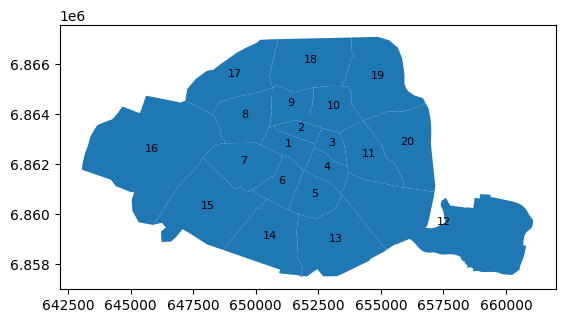

In [53]:
# Make a quick visualization of the districts
arrondissements.plot()

for idx, row in arrondissements.iterrows():
    # Get the centroid of the district to place the label
    centroid = row.geometry.centroid
    plt.text(centroid.x, centroid.y, str(row['c_ar']), fontsize=8, ha='center')

plt.show()


In [54]:
districts_pop = pd.read_csv('../files/paris_arrondissements_population.csv')

In [55]:
districts_pop

,no,Arrondissement,Population
0,1,1st arrondissement (Louvre),16149
1,2,2nd arrondissement (Bourse),21277
2,3,3rd arrondissement (Temple),33651
3,4,4th arrondissement (Hôtel-de-Ville),29326
4,5,5th arrondissement (Panthéon),58050
5,6,6th arrondissement (Luxembourg),40452
6,7,7th arrondissement (Palais-Bourbon),49300
7,8,8th arrondissement (Élysée),36218
8,9,9th arrondissement (Opéra),60784
9,10,10th arrondissement (Entrepôt),83873


In [56]:
print(arrondissements.columns)
print(districts_pop.columns)

Index(['n_sq_ar', 'c_ar', 'c_arinsee', 'l_ar', 'l_aroff', 'n_sq_co', 'surface',
       'perimetre', 'geom_x_y', 'geometry'],
      dtype='object')
Index(['no', 'Arrondissement', 'Population'], dtype='object')


In [57]:
print(arrondissements['c_ar'].dtypes)
print(districts_pop['no'].dtypes)

int64
int64


In [60]:
#arrondissements_pop = arrondissements.merge(districts_pop, on=['c_ar', 'no'])


arrondissements_pop = pd.merge(arrondissements,districts_pop, how='left',left_on=['c_ar'],right_on=['no']).dropna()


In [61]:
arrondissements_pop

,n_sq_ar,c_ar,c_arinsee,l_ar,l_aroff,n_sq_co,surface,perimetre,geom_x_y,geometry,no,Arrondissement,Population
0,750000001,1,75101,1er Ardt,Louvre,750001537,1.824613e+06,6054.936862,"{'lon': 2.3364433620533878, 'lat': 48.86256270...","POLYGON ((650706.580 6863530.880, 650848.899 6...",1,1st arrondissement (Louvre),16149
1,750000002,2,75102,2ème Ardt,Bourse,750001537,9.911537e+05,4554.104360,"{'lon': 2.3428025468913636, 'lat': 48.86827922...","POLYGON ((652426.165 6862905.834, 652383.463 6...",2,2nd arrondissement (Bourse),21277
2,750000003,3,75103,3ème Ardt,Temple,750001537,1.170883e+06,4519.263648,"{'lon': 2.360000985897692, 'lat': 48.862872380...","POLYGON ((653331.960 6863240.808, 653336.416 6...",3,3rd arrondissement (Temple),33651
3,750000004,4,75104,4ème Ardt,Hôtel-de-Ville,750001537,1.600586e+06,5420.908434,"{'lon': 2.357629620324997, 'lat': 48.854341426...","POLYGON ((653665.113 6861929.286, 653699.365 6...",4,4th arrondissement (Hôtel-de-Ville),29326
4,750000005,5,75105,5ème Ardt,Panthéon,750001537,2.539375e+06,6239.195396,"{'lon': 2.3507146095752587, 'lat': 48.84444315...","POLYGON ((653357.222 6860864.913, 653386.552 6...",5,5th arrondissement (Panthéon),58050
5,750000006,6,75106,6ème Ardt,Luxembourg,750001537,2.153096e+06,6483.686786,"{'lon': 2.3328979990533147, 'lat': 48.84913035...","POLYGON ((651908.510 6861756.243, 651885.552 6...",6,6th arrondissement (Luxembourg),40452
6,750000007,7,75107,7ème Ardt,Palais-Bourbon,750001537,4.090057e+06,8099.424883,"{'lon': 2.3121876914820074, 'lat': 48.85617442...","POLYGON ((650178.890 6862772.559, 650181.704 6...",7,7th arrondissement (Palais-Bourbon),49300
7,750000008,8,75108,8ème Ardt,Élysée,750001537,3.880036e+06,7880.533268,"{'lon': 2.312554022402065, 'lat': 48.872720837...","POLYGON ((650546.989 6863492.739, 650536.022 6...",8,8th arrondissement (Élysée),36218
8,750000009,9,75109,9ème Ardt,Opéra,750001537,2.178303e+06,6471.588290,"{'lon': 2.3374575434825444, 'lat': 48.87716351...","POLYGON ((651581.141 6864870.360, 651584.032 6...",9,9th arrondissement (Opéra),60784
9,750000010,10,75110,10ème Ardt,Entrepôt,750001537,2.891739e+06,6739.375055,"{'lon': 2.360728487847452, 'lat': 48.876130036...","POLYGON ((653409.972 6865115.534, 653422.362 6...",10,10th arrondissement (Entrepôt),83873


### Explore the districts of Paris

In [62]:
# Check what kind of object districts is
print(type(arrondissements_pop))
 
# Check the type of the geometry attribute
print(type(arrondissements_pop.geometry))
 
# Inspect the first rows of the geometry
print(arrondissements_pop.geometry.head())
 
# Inspect the area of the districts
print(arrondissements_pop.geometry.area)

<class 'geopandas.geodataframe.GeoDataFrame'>
<class 'geopandas.geoseries.GeoSeries'>
0    POLYGON ((650706.580 6863530.880, 650848.899 6...
1    POLYGON ((652426.165 6862905.834, 652383.463 6...
2    POLYGON ((653331.960 6863240.808, 653336.416 6...
3    POLYGON ((653665.113 6861929.286, 653699.365 6...
4    POLYGON ((653357.222 6860864.913, 653386.552 6...
Name: geometry, dtype: geometry
0     1.824613e+06
1     9.911537e+05
2     1.170883e+06
3     1.600586e+06
4     2.539375e+06
5     2.153096e+06
6     4.090057e+06
7     3.880036e+06
8     2.178303e+06
9     2.891739e+06
10    3.665442e+06
11    1.631478e+07
12    7.149311e+06
13    5.614877e+06
14    8.494994e+06
15    1.637254e+07
16    5.668835e+06
17    5.996051e+06
18    6.792651e+06
19    5.983446e+06
dtype: float64


### The Magic: transforming csv to Geodataframe

                                 type              x             y  \
0                 European restuarant  259641.691646  6.251867e+06   
1       Traditional French restaurant  259572.339603  6.252030e+06   
2       Traditional French restaurant  259657.276374  6.252143e+06   
3  Indian / Middle Eastern restaurant  259684.438330  6.252203e+06   
4       Traditional French restaurant  259597.943086  6.252230e+06   

                         geometry  
0  POINT (259641.692 6251867.063)  
1  POINT (259572.340 6252029.683)  
2  POINT (259657.276 6252143.401)  
3  POINT (259684.438 6252203.137)  
4  POINT (259597.943 6252230.044)  


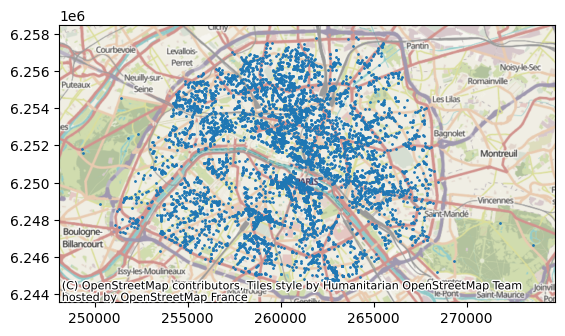

In [59]:
# Convert it to a GeoDataFrame
restaurants_shp = gpd.GeoDataFrame(restaurants, geometry=gpd.points_from_xy(restaurants.x, restaurants.y))
 
# Inspect the first rows of the restaurants GeoDataFrame
print(restaurants_shp.head())
 
# Make a plot of the restaurants
ax = restaurants_shp.plot(markersize=1)

import contextily
contextily.add_basemap(ax)
plt.show()

## Exploring and visualising spatial data

     n_sq_ar  c_ar  c_arinsee       l_ar         l_aroff    n_sq_co  \
0  750000001     1      75101   1er Ardt          Louvre  750001537   
1  750000002     2      75102  2ème Ardt          Bourse  750001537   
2  750000003     3      75103  3ème Ardt          Temple  750001537   
3  750000004     4      75104  4ème Ardt  Hôtel-de-Ville  750001537   
4  750000005     5      75105  5ème Ardt        Panthéon  750001537   

        surface    perimetre  \
0  1.824613e+06  6054.936862   
1  9.911537e+05  4554.104360   
2  1.170883e+06  4519.263648   
3  1.600586e+06  5420.908434   
4  2.539375e+06  6239.195396   

                                            geom_x_y  \
0  {'lon': 2.3364433620533878, 'lat': 48.86256270...   
1  {'lon': 2.3428025468913636, 'lat': 48.86827922...   
2  {'lon': 2.360000985897692, 'lat': 48.862872380...   
3  {'lon': 2.357629620324997, 'lat': 48.854341426...   
4  {'lon': 2.3507146095752587, 'lat': 48.84444315...   

                                           

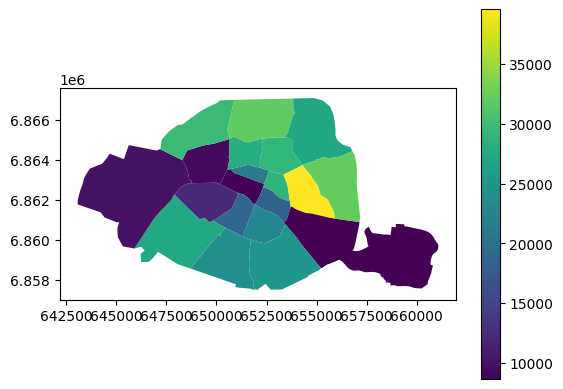

In [64]:
# Inspect the first rows of the districts dataset
print(arrondissements_pop.head())
 
# Inspect the area of the districts
print(arrondissements_pop.area)
 
# Add a population density column
arrondissements_pop['population_density'] = arrondissements_pop.Population / arrondissements_pop.area * 10**6
 
# Make a plot of the districts colored by the population density
arrondissements_pop.plot(column='population_density', legend=True)
plt.show()

Name of the districts in Paris

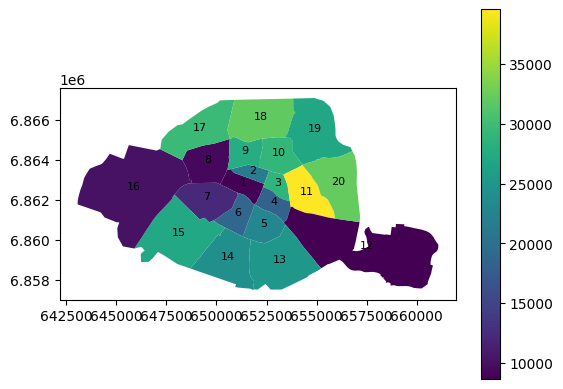

In [68]:
arrondissements_pop.plot(column='population_density', legend=True)

for idx, row in arrondissements_pop.iterrows():
    # Get the centroid of the district to place the label
    centroid = row.geometry.centroid
    plt.text(centroid.x, centroid.y, str(row['c_ar']), fontsize=8, ha='center')

plt.show()


## Group by

In [66]:
# Load the restaurants data: restaurants_shp 

# Calculate the number of restaurants of each type
type_counts = restaurants_shp.groupby('type').size()
 
# Print the result
print(type_counts)

type
African restaurant                        138
Asian restaurant                         1642
Caribbean restaurant                       27
Central and South American restuarant      97
European restuarant                      1178
Indian / Middle Eastern restaurant        394
Maghrebian restaurant                     207
Other world restaurant                    107
Traditional French restaurant            1945
dtype: int64


### Plotting multiple layers

Another typical pandas functionality is filtering a dataframe: taking a subset of the rows based on a condition (which generates a boolean mask).

In this exercise, we will take the subset of all Asian restaurants, and then make a multi-layered plot. In such a plot, we combine the visualization of several GeoDataFrames on a single figure. To add one layer, we can use the ax keyword of the plot() method of a GeoDataFrame to pass it a matplotlib axes object.

In [ ]:
# Take a subset of the Asian restaurants
asian_restaurants = restaurants_shp[restaurants_shp['type'] == 'Asian restaurant']

# Create a multi-layered plot with specified size
fig, ax = plt.subplots(figsize=(10, 10))  # Adjusted size for clarity

# Plot all restaurants in grey
restaurants_shp.plot(color='grey', ax=ax)

# Plot Asian restaurants in red over the existing plot
asian_restaurants.plot(color='red', ax=ax)
#contextily.add_basemap(ax)

# Display the plot
plt.show()
